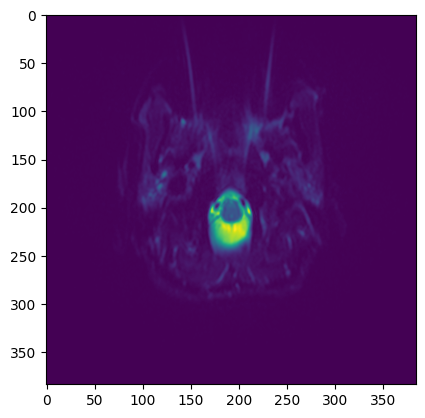

In [75]:
import pydicom as dicom
import numpy as np
import matplotlib.pylab as plt
import nibabel as nib
import os

# specify your image path
image_path = '../raw_data/MRI/MR.1.3.12.2.1107.5.2.19.45302.2022120716143864994303937'
ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array)

In [41]:
file_list = os.listdir("../raw_data/MRI")
slices = [dicom.dcmread("../raw_data/MRI/" + path) for path in file_list[3:]]

In [92]:
names = [ds.SeriesDescription for ds in slices]
np.unique(names,return_counts=True)

(array(['ep2d_diff_tra_ADC', 'ep2d_diff_tra_TRACEW', 't1_mprage_we_sag',
        't1_mprage_we_sag_MPR_cor', 't1_mprage_we_sag_MPR_tra',
        't1_tse_cor', 't1_tse_fs_cor', 't1_tse_sag', 't2_tse_fs_cor',
        't2_tse_fs_sag'], dtype='<U24'),
 array([ 30,  60, 208, 200, 210,  15,  15,  15,  15,  15]))

In [103]:
slices.sort(key=lambda x: int(x.SliceLocation))
tfl3d1rr16ns = [slic.SeriesDescription == 't2_tse_fs_cor' for slic in slices]
slice_one_type = np.array(slices)[tfl3d1rr16ns]

In [104]:
import nibabel as nib
from ipywidgets import interact
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

cmap = plt.cm.winter
# Get the colormap colors
my_cmap = cmap(np.arange(cmap.N))
my_cmap[:,-1] = np.linspace(0, 1, cmap.N)
my_cmap = ListedColormap(my_cmap)

# Visualize Images as a slider
def show_slice(i):
    plt.imshow(slices[i].pixel_array, cmap='gray')
    plt.show()

interact(show_slice, i=(0, len(slice_one_type)))

interactive(children=(IntSlider(value=7, description='i', max=15), Output()), _dom_classes=('widget-interact',…

<function __main__.show_slice(i)>

In [52]:
# Sort the DICOM files by their Instance Number
slices.sort(key=lambda x: int(x.InstanceNumber))

# Stack the slices to create a single 3D array
# The pixel_array of each DICOM slice is a 2D array

image_data = [df.pixel_array for df in slices if df.SequenceName == '*tse2d1_3']

In [53]:
np.unique([img.shape for img in image_data])

array([256, 320, 512])

In [20]:
import os
import pydicom
import numpy as np
import nibabel as nib

# Sort the DICOM files by their Instance Number
slices.sort(key=lambda x: int(x.InstanceNumber))

# Stack the slices to create a single 3D array
# The pixel_array of each DICOM slice is a 2D array
image_data = np.stack([df.pixel_array for df in slices])

# Convert the voxel data to the right type (e.g., float32)
image_data = image_data.astype(np.float32)

# Create a NIfTI image (this doesn't consider the DICOM affine transformation)
nifti_img = nib.Nifti1Image(image_data, affine=np.eye(4))

# Save the NIfTI image to a file
nifti_file_path = '../raw_data/nii_files/first_image.nii'
nib.save(nifti_img, nifti_file_path)

print(f"Saved NIfTI image to {nifti_file_path}")


ValueError: all input arrays must have the same shape

In [18]:
import numpy as np
np.unique(AccessionNumber)

array(['wATLvm-a5ftVG3W1EpfSWrNgwCTRdgCp3w6gucH-Zrg='], dtype='<U44')

In [16]:
import dicom2nifti

dicom2nifti.convert_directory('../raw_data/MRI/',
                              "../raw_data/nii_files/")

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: '8yVN-UIZSirUlVRfycgGFaw1vygVUHz74fRGJNlyPOg='. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'KsnPCDgBVsJrwFnsnxr4uVQtAY6H5LHiP3QzjwCPxyw='. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pydicom/valuerep.py:443: UserWarning: Invalid value for VR UI: 'LkENROE8r9tNCYm_ro0_E-ecckT6KXBB7kqhmVIZlYg='. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/py

Traceback (most recent call last):
  File "/anaconda/envs/azureml_py38/lib/python3.8/site-packages/dicom2nifti/convert_dir.py", line 85, in convert_directory
    convert_dicom.dicom_array_to_nifti(dicom_input, nifti_file, reorient)
  File "/anaconda/envs/azureml_py38/lib/python3.8/site-packages/dicom2nifti/convert_dicom.py", line 119, in dicom_array_to_nifti
    results = convert_siemens.dicom_to_nifti(dicom_list, output_file)
  File "/anaconda/envs/azureml_py38/lib/python3.8/site-packages/dicom2nifti/convert_siemens.py", line 79, in dicom_to_nifti
    return convert_generic.dicom_to_nifti(dicom_input, output_file)
  File "/anaconda/envs/azureml_py38/lib/python3.8/site-packages/dicom2nifti/convert_generic.py", line 271, in dicom_to_nifti
    data = common.get_volume_pixeldata(dicom_input)
  File "/anaconda/envs/azureml_py38/lib/python3.8/site-packages/dicom2nifti/common.py", line 309, in get_volume_pixeldata
    slice_data = _get_slice_pixeldata(slice_)
  File "/anaconda/envs/azureml_p